# Porsche 911 
---

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/2013_Porsche_911_Carrera_4S_%28991%29_%289626546987%29.jpg/1920px-2013_Porsche_911_Carrera_4S_%28991%29_%289626546987%29.jpg)
This is a clean version of original notebook it try to keep everything in a neat a presentation ready format.
-
[Scratch work notebook](https://github.com/popkdodge/Unit-2-Build/blob/master/Porsche_911.ipynb)  
[Unclean Dataset (post webscrapped)](https://github.com/popkdodge/Unit-2-Build/tree/master/Porsche_Datasets)  
[Webs-scrapper Code](https://github.com/popkdodge/Unit-2-Build/blob/master/WebScrapping1.py)  
[Plotly Dash Code](https://github.com/popkdodge/dash-template)  
[Medium Post](https://github.com/popkdodge/Unit-2-Build/blob/master/Porsche_911.ipynb)  
[Website Heroku](https://porsche911.herokuapp.com/)  
[Data Cleaning note](https://github.com/popkdodge/Unit-2-Build/blob/master/Porsche_cleaning.ipynb)



In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,RobustScaler
import scipy
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import GridSearchCV
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.style as style


In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Carrera_911_1_2.csv',index_col=[0])

## Quick data engineering
---

In [47]:
df['Cabriolet'] = df['Cabriolet'].replace("Black",'Hardtop')
df['Cabriolet'] = df['Cabriolet'].replace("Edition",'Hardtop')
df['Price'] = df['Price'].astype(int)
df['condition'] = df['condition'].replace("Porsche Certified",'CPO')

## Train Test Split
---

In [48]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.20)

In [49]:
train

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
750,Used,24779,70955,2013,Porsche,911,Carrera,S,Hardtop,Gray/Silver,Automatic
1431,Used,7742,93800,2018,Porsche,911,Carrera,S,Hardtop,Red,Manual
1132,Used,9779,122550,2016,Porsche,911,Carrera,GTS,Hardtop,Red,Automatic
68,Used,34042,56995,2014,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
1236,Used,18259,69950,2011,Porsche,911,Carrera,S,Hardtop,Black,Manual
...,...,...,...,...,...,...,...,...,...,...,...
173,Used,13542,97950,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
266,Used,11064,91598,2017,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
1365,Used,25906,93995,2016,Porsche,911,Carrera,GTS,Hardtop,Other,Manual
677,Used,23622,45999,2007,Porsche,911,Carrera,S,Cabriolet,Other,Automatic


In [50]:
test

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
1493,Used,19826,99950,2017,Porsche,911,Carrera,4S,Hardtop,White,Manual
108,Used,23556,74995,2013,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
1383,Used,11813,84000,2016,Porsche,911,Carrera,4S,Hardtop,Other,Manual
936,Used,26775,67500,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
682,CPO,30846,69980,2015,Porsche,911,Carrera,S,Hardtop,Other,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1494,Used,15710,89995,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
271,Used,21930,75000,2014,Porsche,911,Carrera,S,Hardtop,Black,Automatic
768,Used,12735,97949,2017,Porsche,911,Carrera,4S,Hardtop,Gray/Silver,Automatic
897,Used,18563,72990,2017,Porsche,911,Carrera,Base,Hardtop,White,Automatic


## EDA
---

In [51]:
#function for ploting Histogram,Q-Q plot and 
# Box plot of target and also print skewness
def target_analysis(target):
    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(target,norm_hist=True,ax=ax1)
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(target,plot=ax2)
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Box Plot')
    sns.boxplot(target,orient='v',ax=ax3)
    print(f'skweness is { target.skew()}')
    plt.show()

skweness is 0.5296793150199285


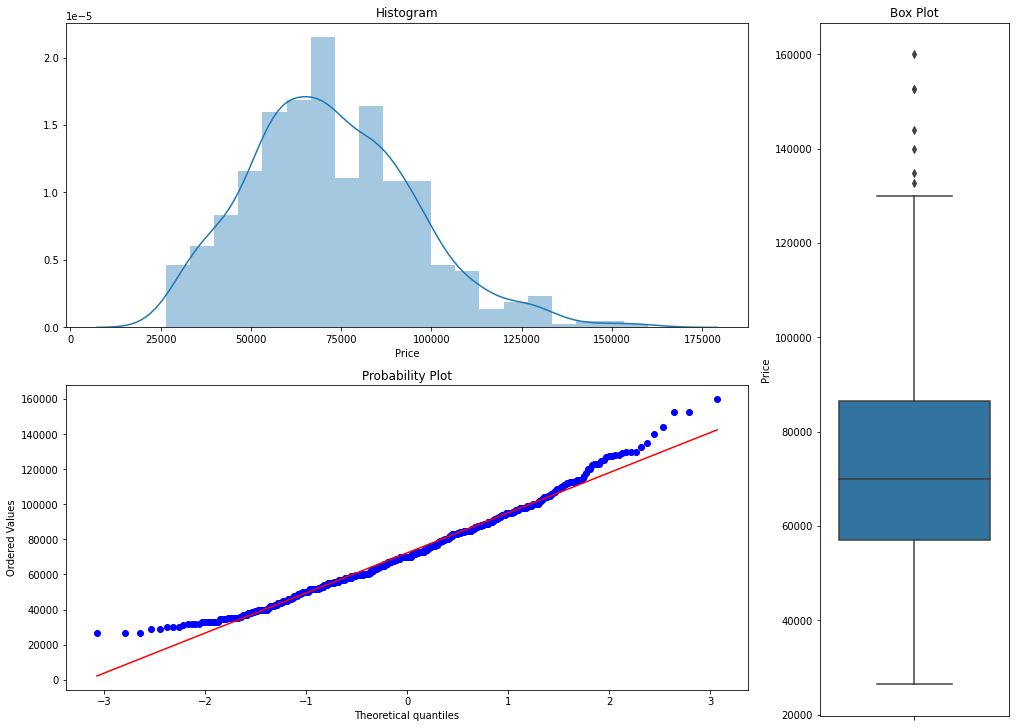

In [52]:
target_analysis(train['Price'])

skweness is -0.37658961354380205


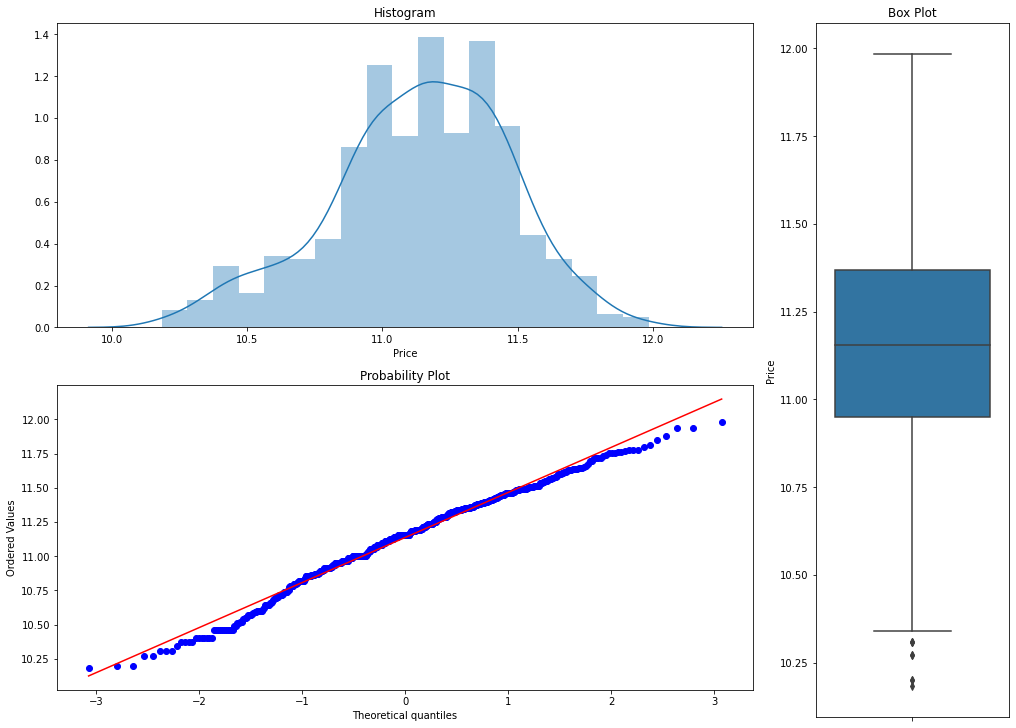

In [53]:
target_analysis(np.log1p(train['Price']))

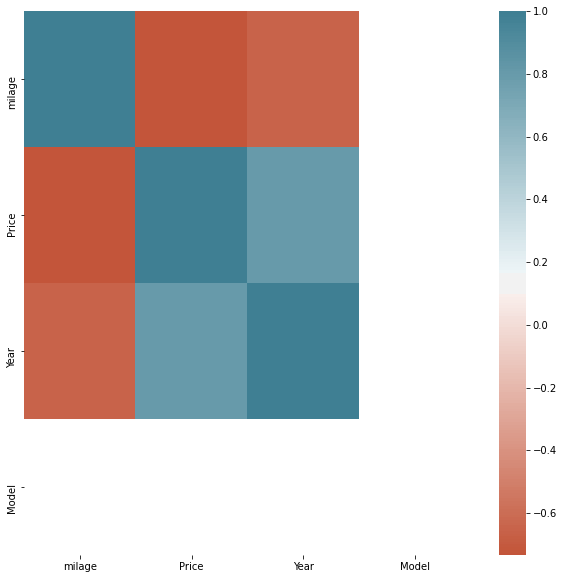

In [10]:
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

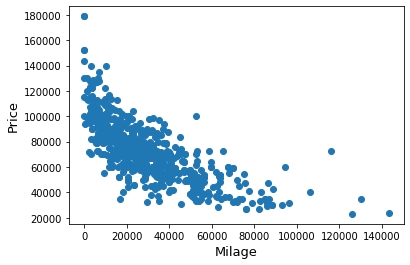

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['milage'], y = train['Price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Milage', fontsize=13)
plt.show()

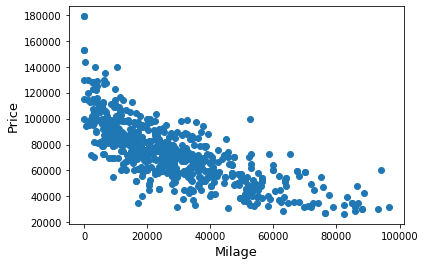

In [12]:

#Deleting outliers
train = train.drop(train[(train['milage']>100000) & (train['Price']<165000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['milage'], train['Price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Milage', fontsize=13)
plt.show()

## Converting to Log to normalized distribution of Price
---


In [54]:
train['Price'] = np.log1p(train.Price)

In [14]:
#test['Price']= np.log1p(test.Price)

## Feature Selection
---

In [55]:
feature = ['condition','milage','Year','S_RS','Cabriolet','Color','Transmission']
target = 'Price'
X_train = train[feature]
X_test = test[feature]
Y_test = test[target]
Y_train = train[target]

## Establishing Baseline
---

In [16]:
# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = Y_train.mean()

Mean Baseline (using 0 features)


In [17]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(Y_train)
predictions = np.expm1(y_pred)
mae = mean_absolute_error(np.expm1(Y_train), predictions)
print(f'Train Error: ${mae:.2f}')

Train Error: $18337.32


In [18]:
# Test Error
y_pred = [guess] * len(Y_test)
predictions = np.expm1(y_pred)
mae = mean_absolute_error(Y_test, predictions)
print(f'Test Error: ${mae:.2f}')

Test Error: $19222.48


### Linear Model (RIDGE)
---

In [20]:
!pip install category_encoders

     |████████████████████████████████| 81kB 1.8MB/s 


In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.BinaryEncoder(), 
    KNNImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    Ridge()
)

param_distributions = {
    'knnimputer__n_neighbors': [3,4,5,6,7,8], 
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': [0.1, 1,8,9,10,15], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

In [22]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE: ${mae:,.0f}')

Best hyperparameters {'selectkbest__k': 7, 'ridge__alpha': 0.1, 'knnimputer__n_neighbors': 6}
Cross-validation MAE 0.1032822371295465
Test MAE: $7,974


## RandomForrest
---

In [23]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

In [24]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE: ${mae:,.0f}')

Best hyperparameters {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.8882500533718041, 'randomforestregressor__n_estimators': 487, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 8}
Cross-validation MAE 0.0730808891660881
Test MAE: $4,776


## Gradient Boost
---

In [25]:
from sklearn.ensemble import GradientBoostingRegressor


pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    GradientBoostingRegressor(random_state=42)
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'gradientboostingregressor__max_depth': [5, 10, 15, 20, None], 
    'gradientboostingregressor__loss': ['ls','lad','huber','quantile'], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

In [26]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE: ${mae:,.0f}')

Best hyperparameters {'gradientboostingregressor__loss': 'lad', 'gradientboostingregressor__max_depth': 20, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 21}
Cross-validation MAE 0.0759769389156911
Test MAE: $5,106


## LinearSVR (Linear)
---

In [27]:
from sklearn.svm import LinearSVR

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    LinearSVR()
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'],}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

In [28]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE: ${mae:,.0f}')

Best hyperparameters {'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 151}
Cross-validation MAE 0.08162750759110426
Test MAE: $6,319


XGBOOST (Regressor)
---

In [42]:
from xgboost import XGBRegressor
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    XGBRegressor(random_state=42,n_jobs=-1)
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbregressor__learning_rate': [.03, 0.05, .07 ,0.13,0.2],
    'xgbregressor__max_depth': [5, 6, 7],}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

[05:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


In [56]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE: ${mae:,.0f}')

Best hyperparameters {'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 1, 'xgbregressor__learning_rate': 0.13, 'xgbregressor__max_depth': 6}
Cross-validation MAE 0.07228250925016091
Test MAE: $2,561


### SAVING BEST MODEL (PICKEL JAR)
---

In [31]:
import joblib
joblib.dump(pipeline, '911_Price.pkl') 

['911_Price.pkl']

In [32]:
model = joblib.load('911_Price.pkl')

[05:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Neural Network
---

In [33]:
from sklearn.neural_network import MLPRegressor
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    MLPRegressor()
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'],
    }

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

In [34]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)
predictions = np.expm1(y_pred)
predictions
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE: ${mae:,.0f}')

Best hyperparameters {'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 534}
Cross-validation MAE 0.36402675834040404
Test MAE: $60,639


### Permutation_Importance
---

In [35]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(pipeline,
                            X_test,
                            Y_test,
                            random_state=42,
                            n_jobs=-1)

p_importance = pd.DataFrame({'feature' : X_test.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=False).tail(10)

,feature,weight,std
4,Cabriolet,0.000045,0.000005
2,Year,0.000022,0.000007
1,milage,0.000004,0.000004
0,condition,0.000002,0.000003
3,S_RS,0.000000,0.000000
5,Color,0.000000,0.000000
6,Transmission,0.000000,0.000000


### MAE Base line for each year
---

In [36]:

for i in range (2012, 2020):
    guess = round(df.Price[df.Year==i].mean())
    errors = guess - df['Price']
    m = round(df.Price[df.Year==i].mean())
    #print(i,'average price is ${}.'.format(m))
    mean_absolute_error = round(errors.abs().mean(),0)
    print('Mean absolute error for year {} is ${}.'.format(i,mean_absolute_error))

Mean absolute error for year 2012 is $19947.0.
Mean absolute error for year 2013 is $20225.0.
Mean absolute error for year 2014 is $18744.0.
Mean absolute error for year 2015 is $18632.0.
Mean absolute error for year 2016 is $22666.0.
Mean absolute error for year 2017 is $23336.0.
Mean absolute error for year 2018 is $28290.0.
Mean absolute error for year 2019 is $40999.0.


## PDP BOX and PLOT
---

In [39]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 70kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=97675306cc3fdfda71d10f238356f64d83b561673380ee32ecdc7fd8558c8d24
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [57]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
feature = 'Year'

isolated = pdp_isolate(
    model= pipeline,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f8ff2fe5b38>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f8ff31cb278>})

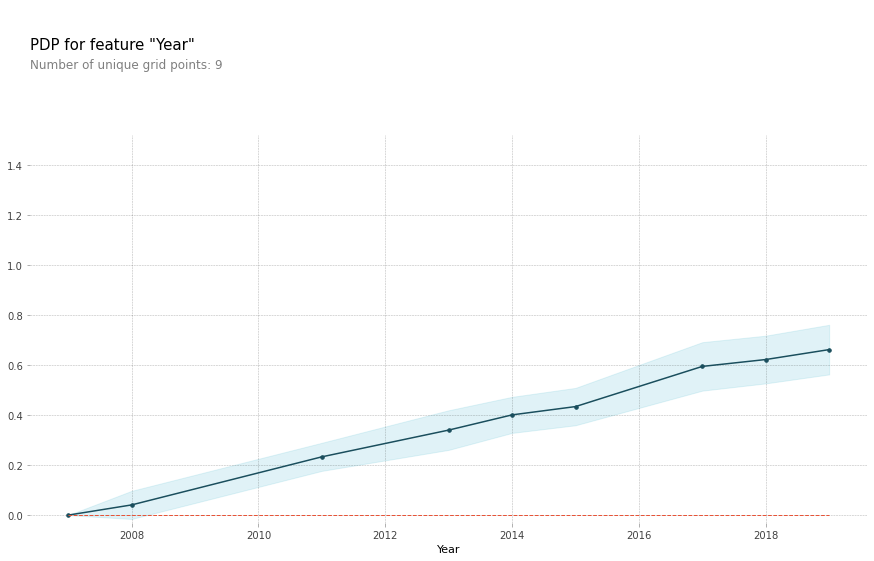

In [58]:
pdp_plot(isolated, feature_name=feature)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


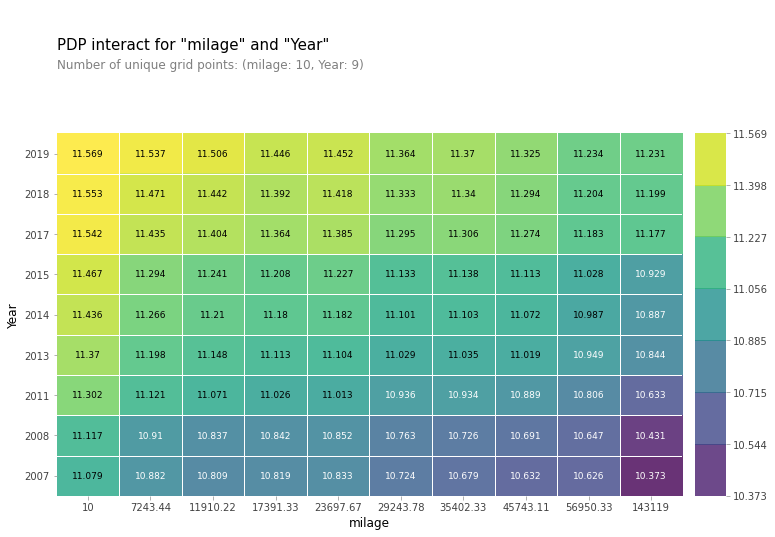

In [59]:
features = ['milage', 'Year']

interaction = pdp_interact(
    model=pipeline, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features, ncols= "interger", figsize= [12, 9]);

### Extra Visualization (Reused on Heroku site)
---

In [62]:
model.predict(Model_test.drop(columns=['Model','Model_Vers','Brand']))

array([10.813347], dtype=float32)

In [61]:
Model_test = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Test_Car.csv',index_col=[0])
Model_test = Model_test.T
Model_test

,condition,milage,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
210,Used,60000,2012,Porsche,911,Carrera,S,Cabriolet,Black,Automatic


In [63]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
year_for_chart = 2015
np.random.seed(1)
mean = df.Price[df.Year==year_for_chart].mean()
std = df.Price[df.Year==year_for_chart].std()
x = np.random.randn(10000)
spot = (mean)/std
hist_data = [x]
price = np.expm1(model.predict(Model_test.drop(columns=['Model','Model_Vers','Brand'])))
fair = round(price[0],0)
group_labels = ['911 Carrera'] # name of the dataset
number = year_for_chart
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(
    title={
        'text': f"{number} Carrera Price Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f")
    )
fig.add_trace(go.Scatter(
    x=[0],
    y=[0.45],
    text=[f"Mean:{mean:,.0f}"],
    mode="text",
)) 
fig.add_trace(go.Scatter(
    x=[2.13],
    y=[0.3],
    text=[f'1 STD:{(mean+std):,.0f}'],
    mode="text",
)) 
fig.add_trace(go.Scatter(
    x=[-2.11],
    y=[0.3],
    text=[f'-1 STD:{mean-std:,.0f}'],
    mode="text",
)) 
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=0,
            y0=0,
            x1=0,
            y1=0.4,
            line=dict(
                color="Yellow",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=1,
            y0=0,
            x1=1,
            y1=0.23,
            line=dict(
                color="Red",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=-1,
            y0=0,
            x1=-1,
            y1=0.23,
            line=dict(
                color="red",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=spot,
            y0=0,
            x1=spot,
            y1=0.4,
            line=dict(
                color="Green",
                width=3
            )))
fig.show()

In [64]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(x=df.Year, y=df.Price)
fig.show()

In [65]:
import plotly.express as px

fig3 = px.scatter(df, x="Year", y="Price", color="Transmission", trendline="lowess")
fig3.update_layout(
    title="The 991.1 and 991.2",
    xaxis_title="Model Year",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"),
    xaxis=dict(
        range=[2011.5, 2019.5]),
    yaxis=dict(
        range=[30000, 150000]),
        )
fig3.add_trace(go.Scatter(
    x=[year_for_chart],
    y=[price[0]],
    mode="markers",
)) 
fig.add_annotation(
        x=year_for_chart,
        y=price[0],
        xref="x",
        yref="y",
        text="max=5",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )  
fig3.show()